In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [9]:
from google.colab import files
uploaded = files.upload()

Saving ab_test.csv to ab_test (2).csv


In [11]:
df=pd.read_csv('ab_test.csv')
df.head(10)

,user_id,group,views,clicks
0,1,control,3.0,0.0
1,2,control,1.0,0.0
2,3,control,3.0,1.0
3,4,control,5.0,0.0
4,5,control,2.0,0.0
5,6,control,1.0,0.0
6,7,control,5.0,2.0
7,8,control,6.0,0.0
8,9,control,23.0,1.0
9,10,control,1.0,0.0


In [ ]:
# views количество просмотров
# clicks количество кликов

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  80000 non-null  int64  
 1   group    80000 non-null  object 
 2   views    80000 non-null  float64
 3   clicks   80000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.4+ MB


In [13]:
df.duplicated().sum()

0

In [ ]:
# пропусков и дубликатов нет

In [14]:
df.nunique() # все пользователи уникальны

user_id    80000
group          2
views        101
clicks        18
dtype: int64

In [15]:
df.group.value_counts()

group
control    40000
test       40000
Name: count, dtype: int64

In [16]:
df[df.views==0]

,user_id,group,views,clicks


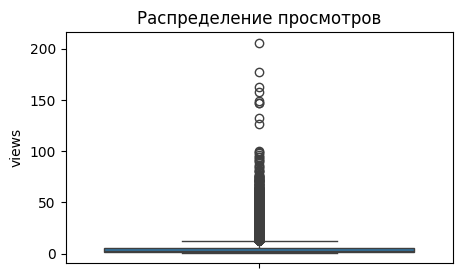

In [17]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, y=df.views);
plt.title('Распределение просмотров');

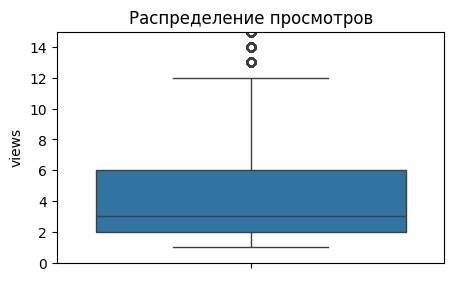

In [18]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, y=df.views);
plt.title('Распределение просмотров');
plt.ylim(0, 15);

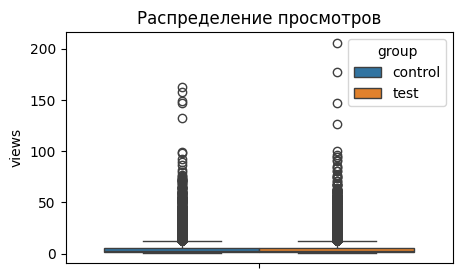

In [19]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, y=df.views, hue='group');
plt.title('Распределение просмотров');

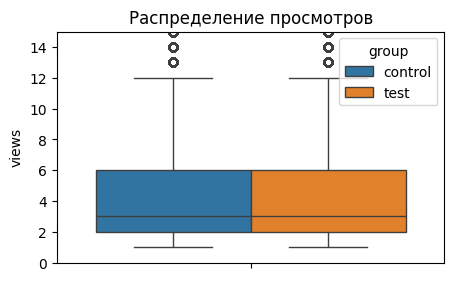

In [20]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, y=df.views, hue='group');
plt.title('Распределение просмотров');
plt.ylim(0, 15);

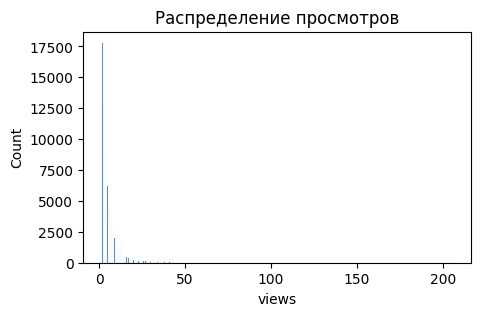

In [21]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x=df.views);
plt.title('Распределение просмотров');

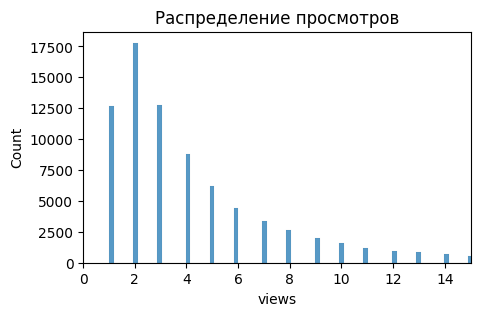

In [22]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x=df.views);
plt.title('Распределение просмотров');
plt.xlim(0, 15);

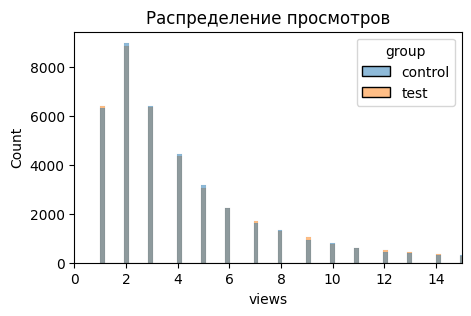

In [23]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x=df.views, hue='group');
plt.title('Распределение просмотров');
plt.xlim(0, 15);

In [24]:
df.groupby('group').agg({'views':'median'})

,views
group,
control,3.0
test,3.0


In [ ]:
# медианы просмотров в группах равны

In [25]:
df.groupby('group').agg({'views':'mean'})

,views
group,
control,4.981050
test,5.015475


In [26]:
a=df[df.group=='control'].views
b=df[df.group=='test'].views
ttest_ind(a, b, equal_var=True)

TtestResult(statistic=-0.8230005760083127, pvalue=0.4105101190964253, df=79998.0)

In [27]:
ttest_ind(a, b, equal_var=False)

TtestResult(statistic=-0.8230005760083127, pvalue=0.4105101191034227, df=79997.77181880406)

In [ ]:
# Так как контрольная и тестовая группы содержат по 40000 наблюдений, выборочные
# средние должны иметь нормальное распределение. Поэтому можем использовать
# t-тест. По результатам t-теста нет статистически значимых различий между
# средними значениями просмотров в группах.

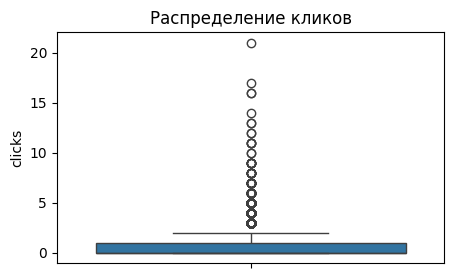

In [28]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, y=df.clicks);
plt.title('Распределение кликов');

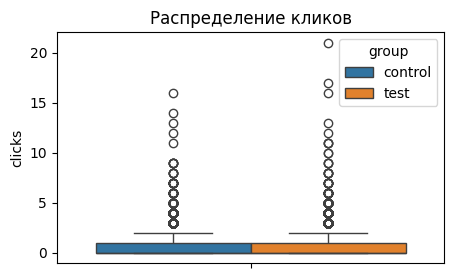

In [29]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, y=df.clicks, hue='group');
plt.title('Распределение кликов');

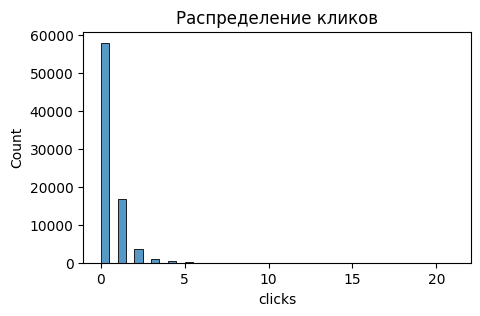

In [30]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x=df.clicks, binwidth=0.5);
plt.title('Распределение кликов');

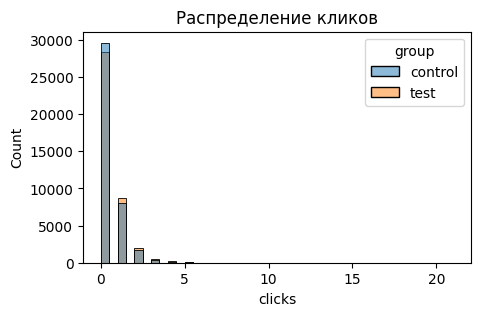

In [31]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x=df.clicks, hue='group', binwidth=0.5);
plt.title('Распределение кликов');

In [32]:
df[df.group=='control'].clicks.value_counts().sort_index()

clicks
0.0     29622
1.0      8031
2.0      1689
3.0       428
4.0       137
5.0        45
6.0        19
7.0        14
8.0         5
9.0         5
11.0        1
12.0        1
13.0        1
14.0        1
16.0        1
Name: count, dtype: int64

In [33]:
df[df.group=='test'].clicks.value_counts().sort_index()

clicks
0.0     28357
1.0      8753
2.0      1990
3.0       565
4.0       202
5.0        87
6.0        20
7.0         8
8.0         5
9.0         3
10.0        2
11.0        3
12.0        1
13.0        1
16.0        1
17.0        1
21.0        1
Name: count, dtype: int64

In [34]:
df.groupby('group').agg({'clicks':'median'})

,clicks
group,
control,0.0
test,0.0


In [35]:
df.groupby('group').agg({'clicks':'mean'})

,clicks
group,
control,0.345725
test,0.401150


In [36]:
a_=df[df.group=='control'].clicks
b_=df[df.group=='test'].clicks
ttest_ind(a_, b_, equal_var=True)

TtestResult(statistic=-10.514051119302698, pvalue=7.737391421972561e-26, df=79998.0)

In [37]:
ttest_ind(a_, b_, equal_var=False)

TtestResult(statistic=-10.514051119302698, pvalue=7.740006758052598e-26, df=79307.32026417195)

In [38]:
mannwhitneyu(a_, b_)

MannwhitneyuResult(statistic=773256088.0, pvalue=1.0192425013680013e-25)

In [ ]:
# По результатам t-теста обнаружены статитстически значимые различия в средних
# значениях кликов между группами. По результатам U-теста распределения кликов
# из разных генеральных совокупностей.

In [39]:
# бутстреп для построения 95% доверительного интервала для разности между
# средними значениями кликов по группам
n=40000
bootstrap=[]
for _ in range(1000):
  c=np.random.choice(a_, n, True)
  t=np.random.choice(b_, n, True)
  bootstrap.append(np.mean(t)-np.mean(c))
print('Среднее количество кликов изменилось на: ', np.mean(b_)-np.mean(a_))
print('95% доверительный интервал: ', np.quantile(bootstrap, 0.025), ' ', \
      np.quantile(bootstrap, 0.975))

Среднее количество кликов изменилось на:  0.055425
95% доверительный интервал:  0.04494749999999999   0.06537625000000001


In [ ]:
# 0 находится вне доверительного интервала, отличия в средних статистически
# значимы

In [ ]:
# По результатам анализа можно сделать выводы:
# - медианные значения просмотров (3) и кликов (0) равны между группами
# - нет статистически значимых различий между средними значениями просмотров
#   между группами
# - есть статистически значимые различия между средними значениями кликов
#   между группами
# - в описании данных нет сведений о том, что несет 1 клик, возможно это крупная
#   покупка, а возможно клик по рекламе
#   так в тестовой группе по 1 клику сделали на 722 пользователя больше, чем в
#   контрольной
# - в целом в зависимости от значимости 1 клика можно рекомендовать оставить
#   вариант тестовой группы, так как среднее значение кликов в тестовой группе
#   значимо увеличилось по сравнению с контрольной